In [58]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [29]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [375]:
df_train1 = pd.read_csv('train.csv')

In [376]:
df_train1.head(10)

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005


In [372]:
df_test1 = pd.read_csv('test.csv')

In [373]:
df_test1.head(10)

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
5,26303,2019-01-01,Finland,KaggleRama,Kaggle Sticker
6,26304,2019-01-01,Norway,KaggleMart,Kaggle Mug
7,26305,2019-01-01,Norway,KaggleMart,Kaggle Hat
8,26306,2019-01-01,Norway,KaggleMart,Kaggle Sticker
9,26307,2019-01-01,Norway,KaggleRama,Kaggle Mug


In [374]:
df_test.head(10)

,row_id,date,country,store,product,day,month,day_month
0,26298,2019-01-01,0,0,1,1,1,2
1,26299,2019-01-01,0,0,0,1,1,2
2,26300,2019-01-01,0,0,2,1,1,2
3,26301,2019-01-01,0,1,1,1,1,2
4,26302,2019-01-01,0,1,0,1,1,2
5,26303,2019-01-01,0,1,2,1,1,2
6,26304,2019-01-01,1,0,1,1,1,2
7,26305,2019-01-01,1,0,0,1,1,2
8,26306,2019-01-01,1,0,2,1,1,2
9,26307,2019-01-01,1,1,1,1,1,2


In [35]:
le = LabelEncoder()
df_country = pd.Series(le.fit_transform(df_train['country']))
df_store = pd.Series(le.fit_transform(df_train['store']))
df_product = pd.Series(le.fit_transform(df_train['product']))

In [36]:
df_train = df_train.drop(columns = ['country', 'product', 'store'])

In [38]:
df_train = pd.concat([df_train, df_country, df_store, df_product], axis = 1)

In [46]:
df_country = pd.Series(le.fit_transform(df_test['country']))
df_store = pd.Series(le.fit_transform(df_test['store']))
df_product = pd.Series(le.fit_transform(df_test['product']))
df_test = df_test.drop(columns = ['country', 'product', 'store'])

df_test = pd.concat([df_test, df_country, df_store, df_product], axis = 1)
df_test = df_test.rename(columns={0:'country', 1:'store', 2:'product'})

In [44]:
df_train = df_train.rename(columns={0:'country', 1:'store', 2:'product'})

In [54]:
df_train.date.min()

'2015-01-01'

In [88]:
df_train_et = df_train.copy()

In [81]:
df_train = df_train_et.copy()

In [82]:
df_train.describe()

,row_id,num_sold,country,store,product
count,26298.000000,26298.000000,26298.000000,26298.00000,26298.000000
mean,13148.500000,387.533577,1.000000,0.50000,1.000000
std,7591.723026,266.076193,0.816512,0.50001,0.816512
min,0.000000,70.000000,0.000000,0.00000,0.000000
25%,6574.250000,190.000000,0.000000,0.00000,0.000000
50%,13148.500000,315.000000,1.000000,0.50000,1.000000
75%,19722.750000,510.000000,2.000000,1.00000,2.000000
max,26297.000000,2884.000000,2.000000,1.00000,2.000000


In [83]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [72]:
df_train.day.value_counts()

16    864
1     864
15    864
14    864
13    864
28    864
12    864
27    864
11    864
26    864
10    864
25    864
9     864
24    864
8     864
23    864
7     864
22    864
6     864
21    864
5     864
20    864
4     864
19    864
3     864
18    864
2     864
17    864
29    810
30    792
31    504
Name: day, dtype: int64

In [84]:
df_train['year'] = df_train['date'].dt.year

In [85]:
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [86]:
df_train['year'] = pd.Series(le.fit_transform(df_train['year']))

In [99]:
df_train['day_month'] = df_train['day'] + df_train['month']

In [111]:
df_train['date'] = df_train_et['date']

In [112]:
df_train['date'].value_counts()

2017-07-22    18
2018-12-02    18
2018-12-03    18
2015-07-01    18
2016-03-02    18
              ..
2017-12-31    14
2017-12-29    14
2018-12-29    13
2017-12-30    13
2018-12-30    13
Name: date, Length: 1461, dtype: int64

EDA

In [79]:
df_train = df_train.agg({'num_sold': ['sum', 'mean', 'count']})

In [113]:
df_train

,row_id,date,num_sold,country,store,product,year,month,day,day_month
0,0,2015-01-01,329,0,0,1,0,1,1,2
1,1,2015-01-01,520,0,0,0,0,1,1,2
2,2,2015-01-01,146,0,0,2,0,1,1,2
3,3,2015-01-01,572,0,1,1,0,1,1,2
4,4,2015-01-01,911,0,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
26293,26293,2018-12-31,823,2,0,0,3,12,31,43
26294,26294,2018-12-31,250,2,0,2,3,12,31,43
26295,26295,2018-12-31,1004,2,1,1,3,12,31,43
26296,26296,2018-12-31,1441,2,1,0,3,12,31,43


In [89]:
g_month_mean = df_train.groupby(['month'], as_index = False)['num_sold'].mean()
g_month_sum = df_train.groupby(['month'], as_index = False)['num_sold'].sum()

In [121]:
g_day_mean = df_train.groupby(['day'], as_index = False)['num_sold'].mean()
g_day_sum = df_train.groupby(['day'], as_index = False)['num_sold'].sum()

In [101]:
g_dm_mean = df_train.groupby(['day_month'], as_index = False)['num_sold'].mean()
g_dm_sum = df_train.groupby(['day_month'], as_index = False)['num_sold'].sum()

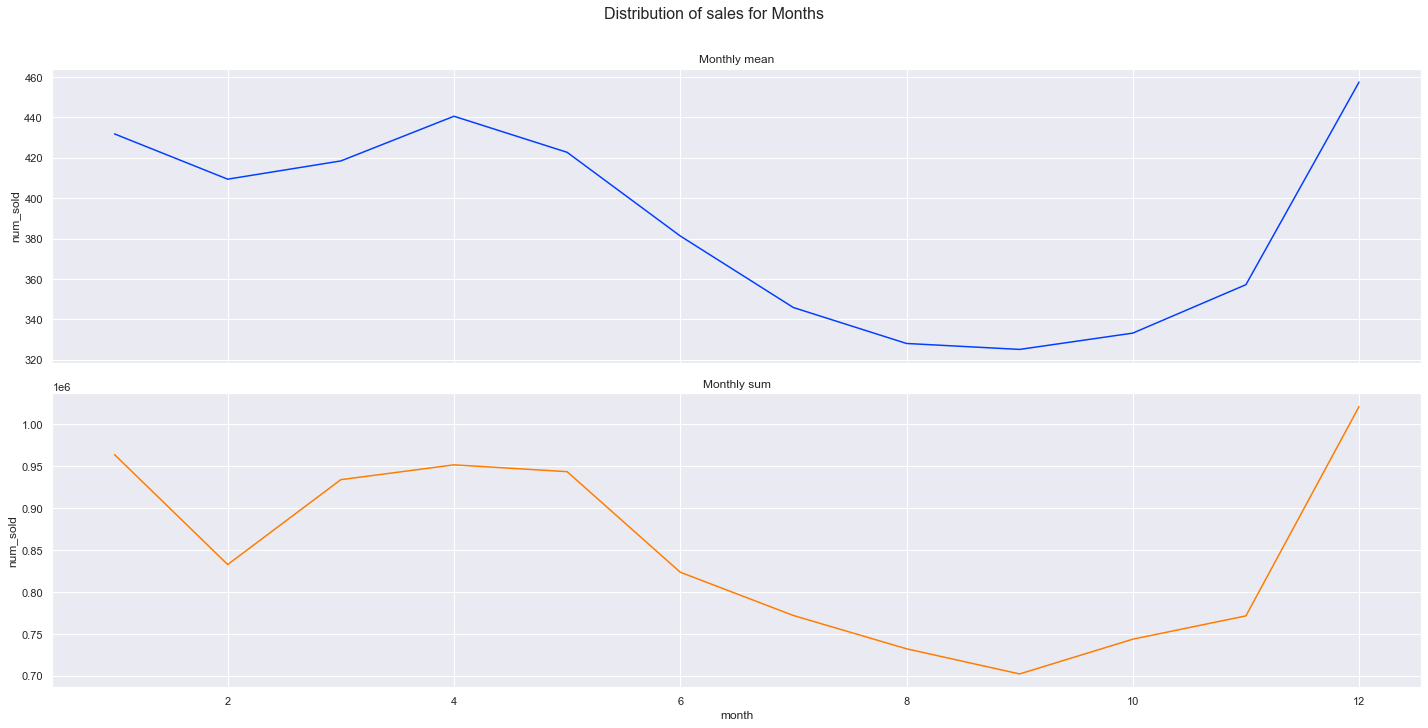

In [96]:
sns.set(color_codes = True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
sns.lineplot(x="month", y="num_sold", data=g_month_mean, ax=axes[0],  color = colors[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="num_sold", data=g_month_sum, ax=axes[1], color = colors[1]).set_title("Monthly sum")
plt.suptitle("Distribution of sales for Months", y=1.01, size = 16)
plt.tight_layout()
plt.show()



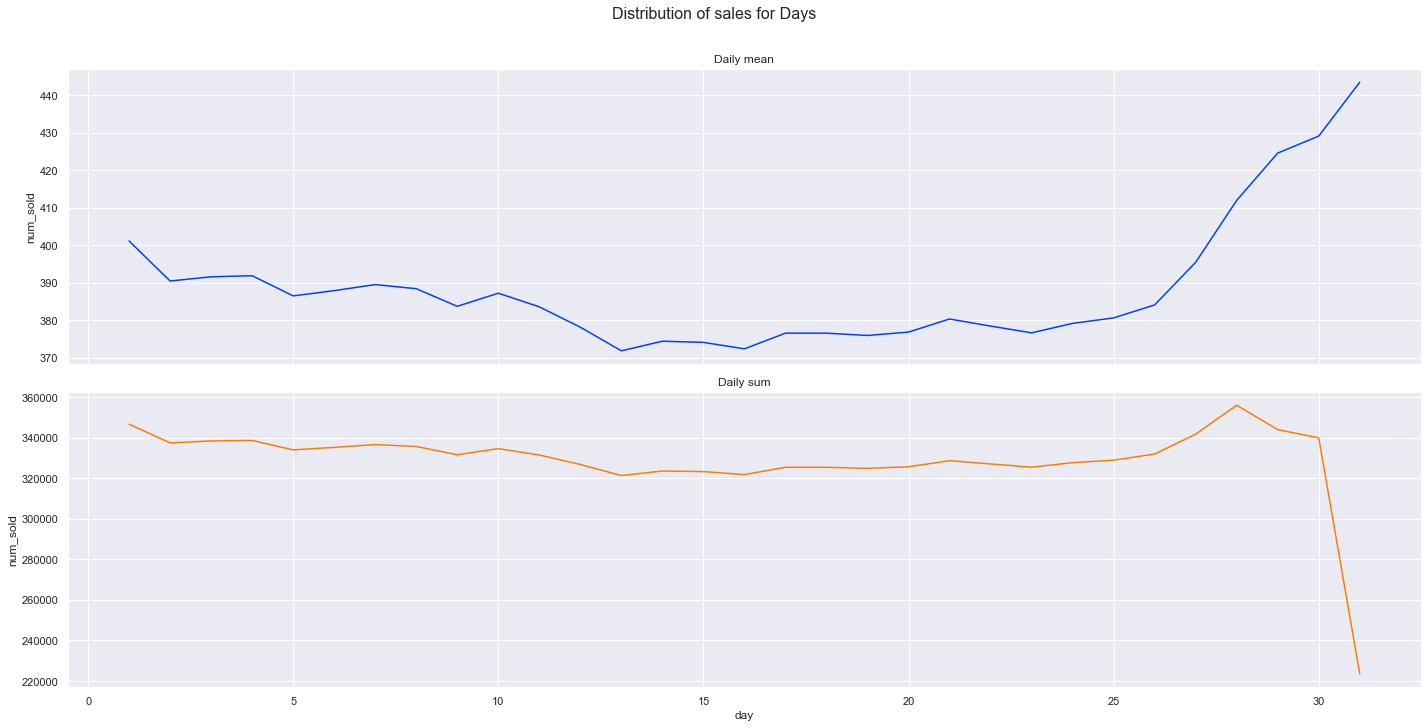

In [98]:
sns.set(color_codes = True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
sns.lineplot(x="day", y="num_sold", data=g_day_mean, ax=axes[0],  color = colors[0]).set_title("Daily mean")
sns.lineplot(x="day", y="num_sold", data=g_day_sum, ax=axes[1], color = colors[1]).set_title("Daily sum")
plt.suptitle("Distribution of sales for Days", y=1.01, size = 16)
plt.tight_layout()
plt.show()

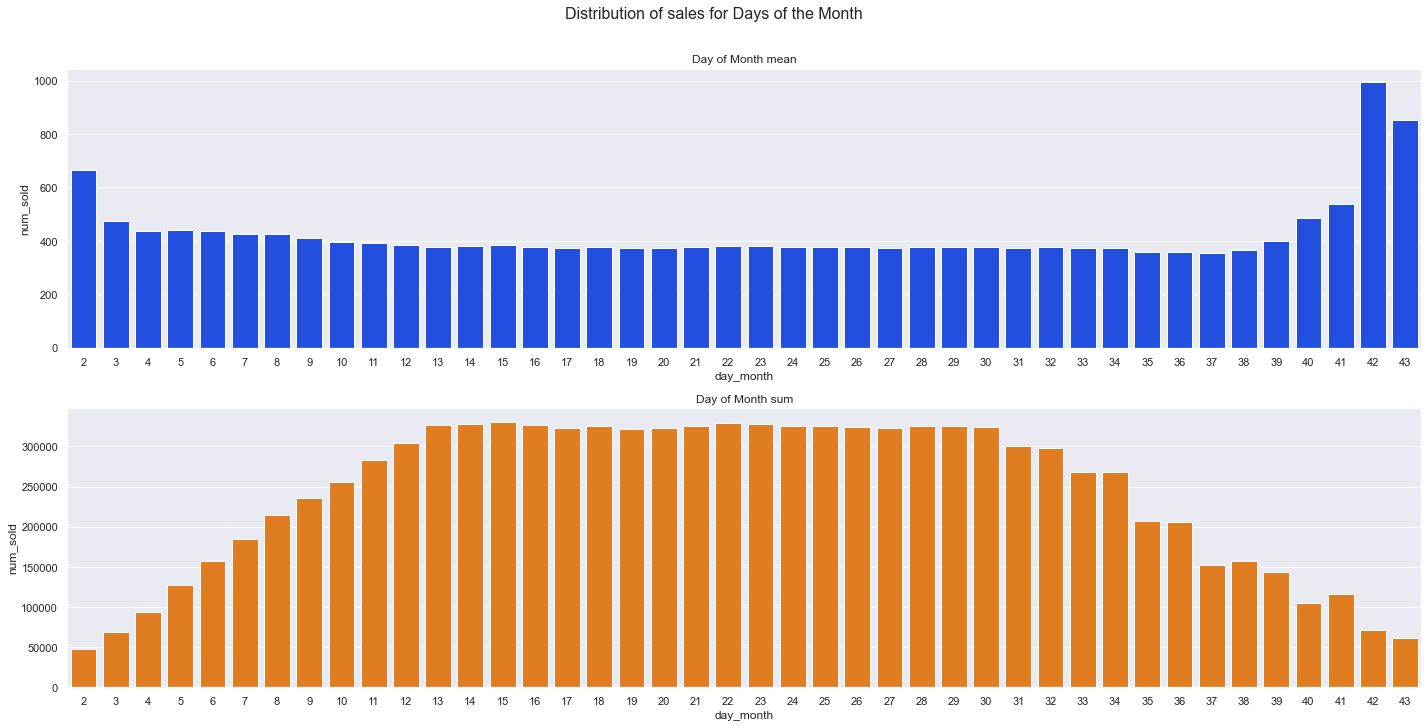

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="day_month", y="num_sold", data=g_dm_mean, ax=axes[0],  color = colors[0]).set_title("Day of Month mean")
sns.barplot(x="day_month", y="num_sold", data=g_dm_sum, ax=axes[1], color = colors[1]).set_title("Day of Month sum")
plt.suptitle("Distribution of sales for Days of the Month", y=1.01, size = 16)
plt.tight_layout()
plt.show()

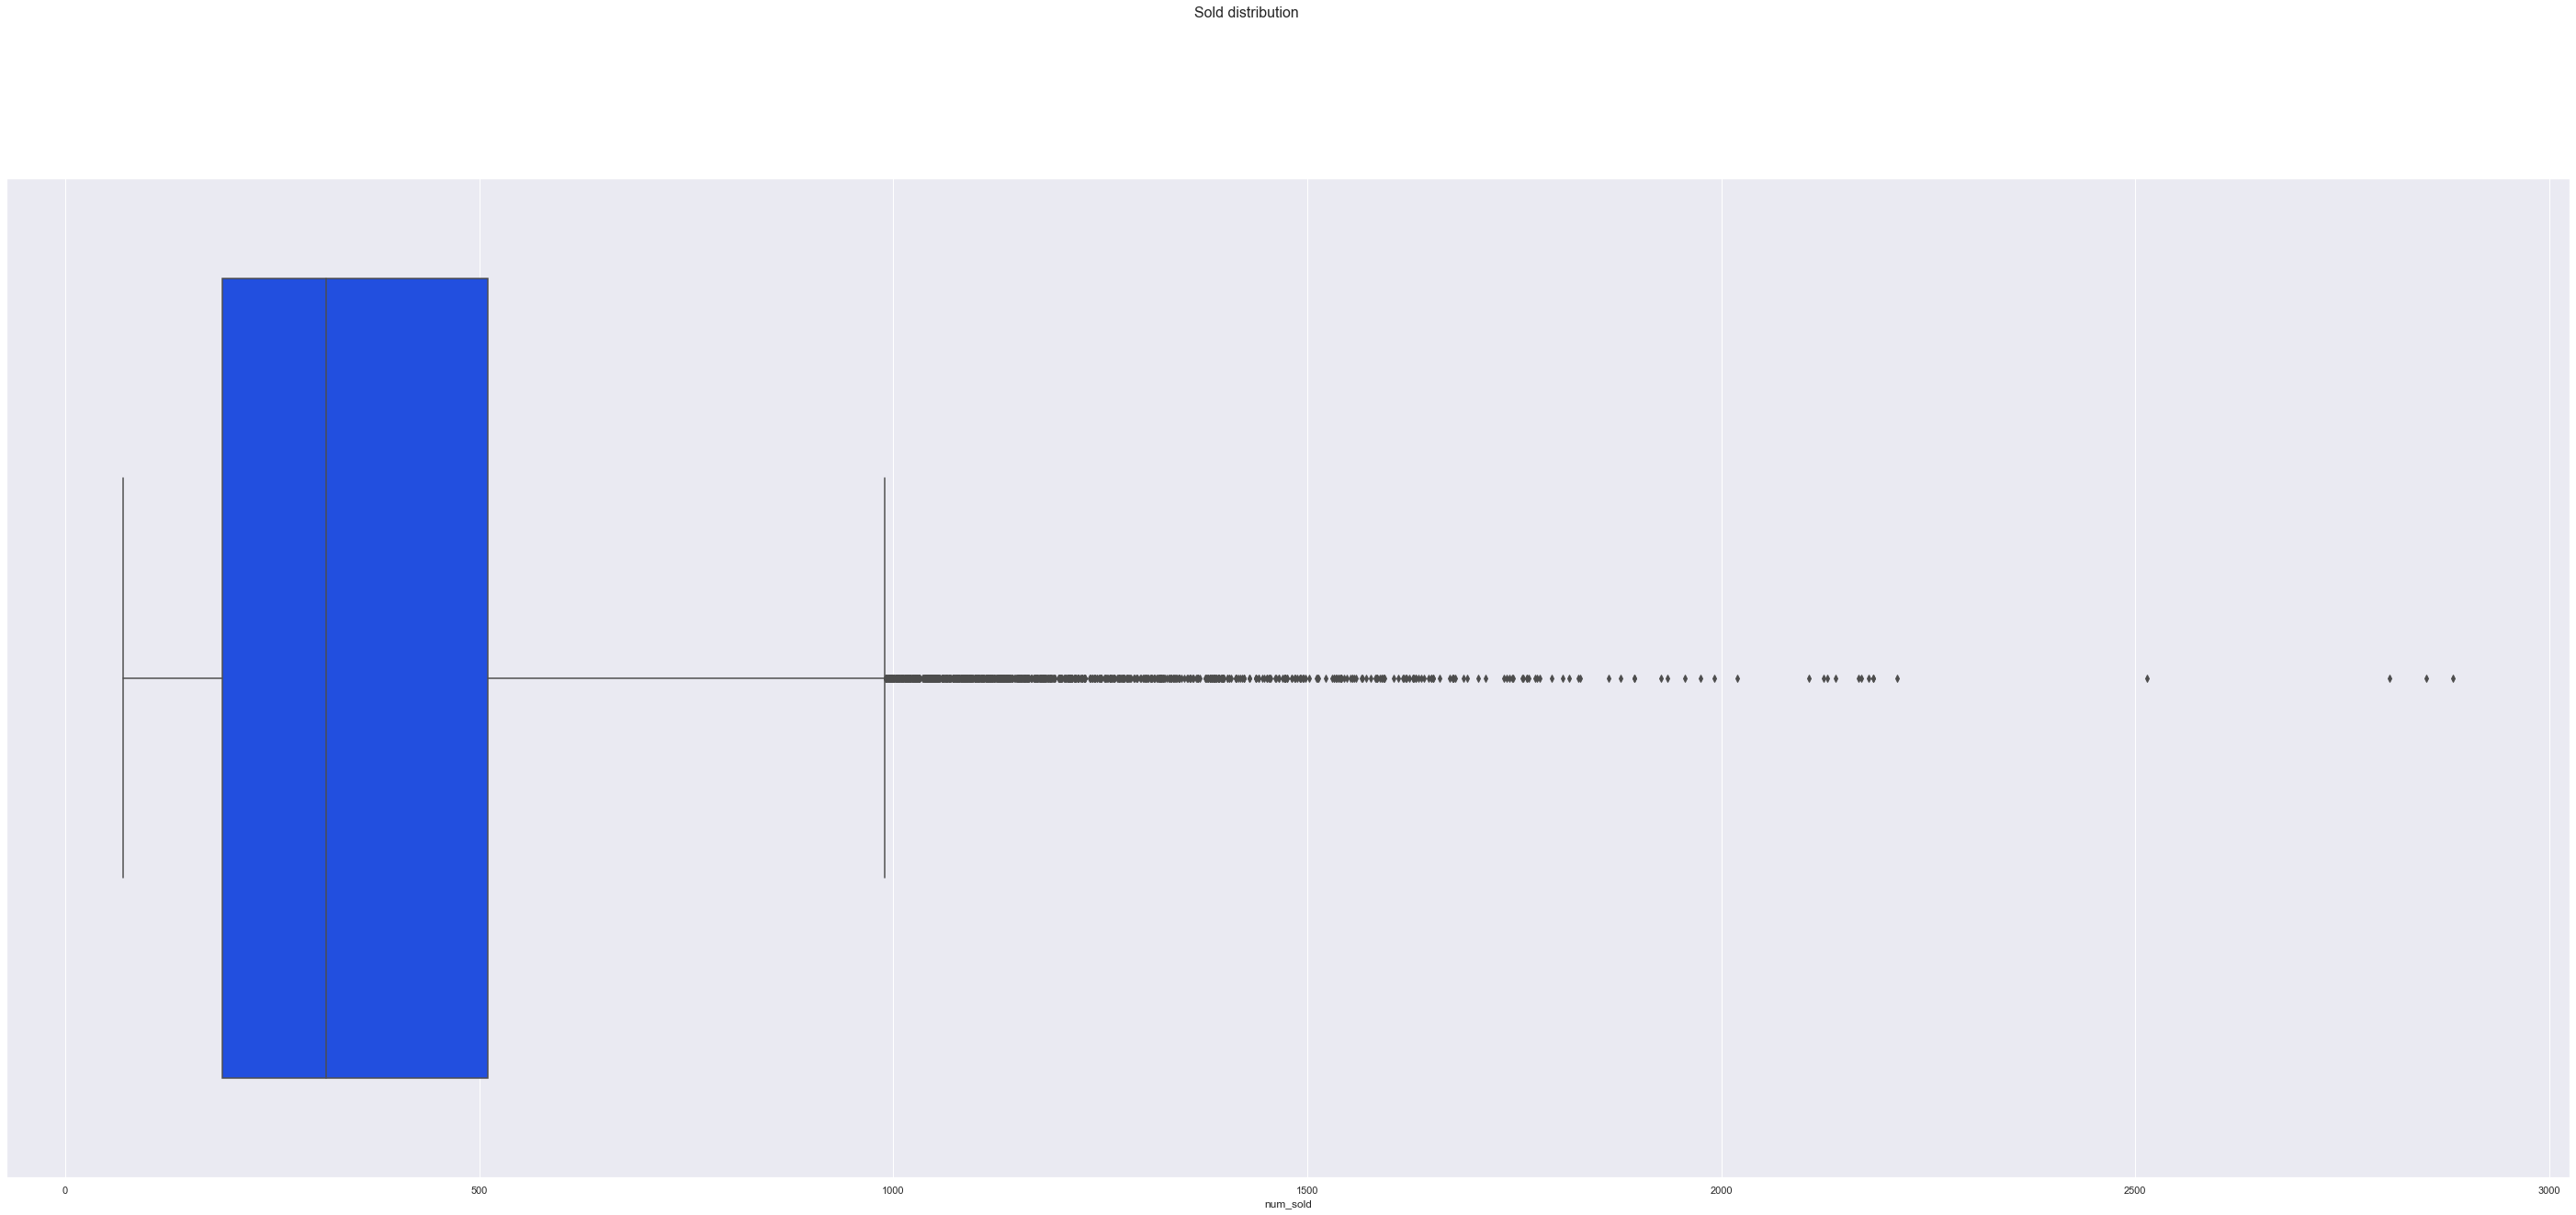

In [104]:
fig, axes = plt.subplots(figsize=(50, 20))
sns.boxplot(df_train["num_sold"], color = colors[0])
plt.suptitle("Sold distribution", y=1.01, size = 16)
#plt.tight_layout()
plt.show()

In [105]:
df_train = df_train.query('num_sold < 1500')

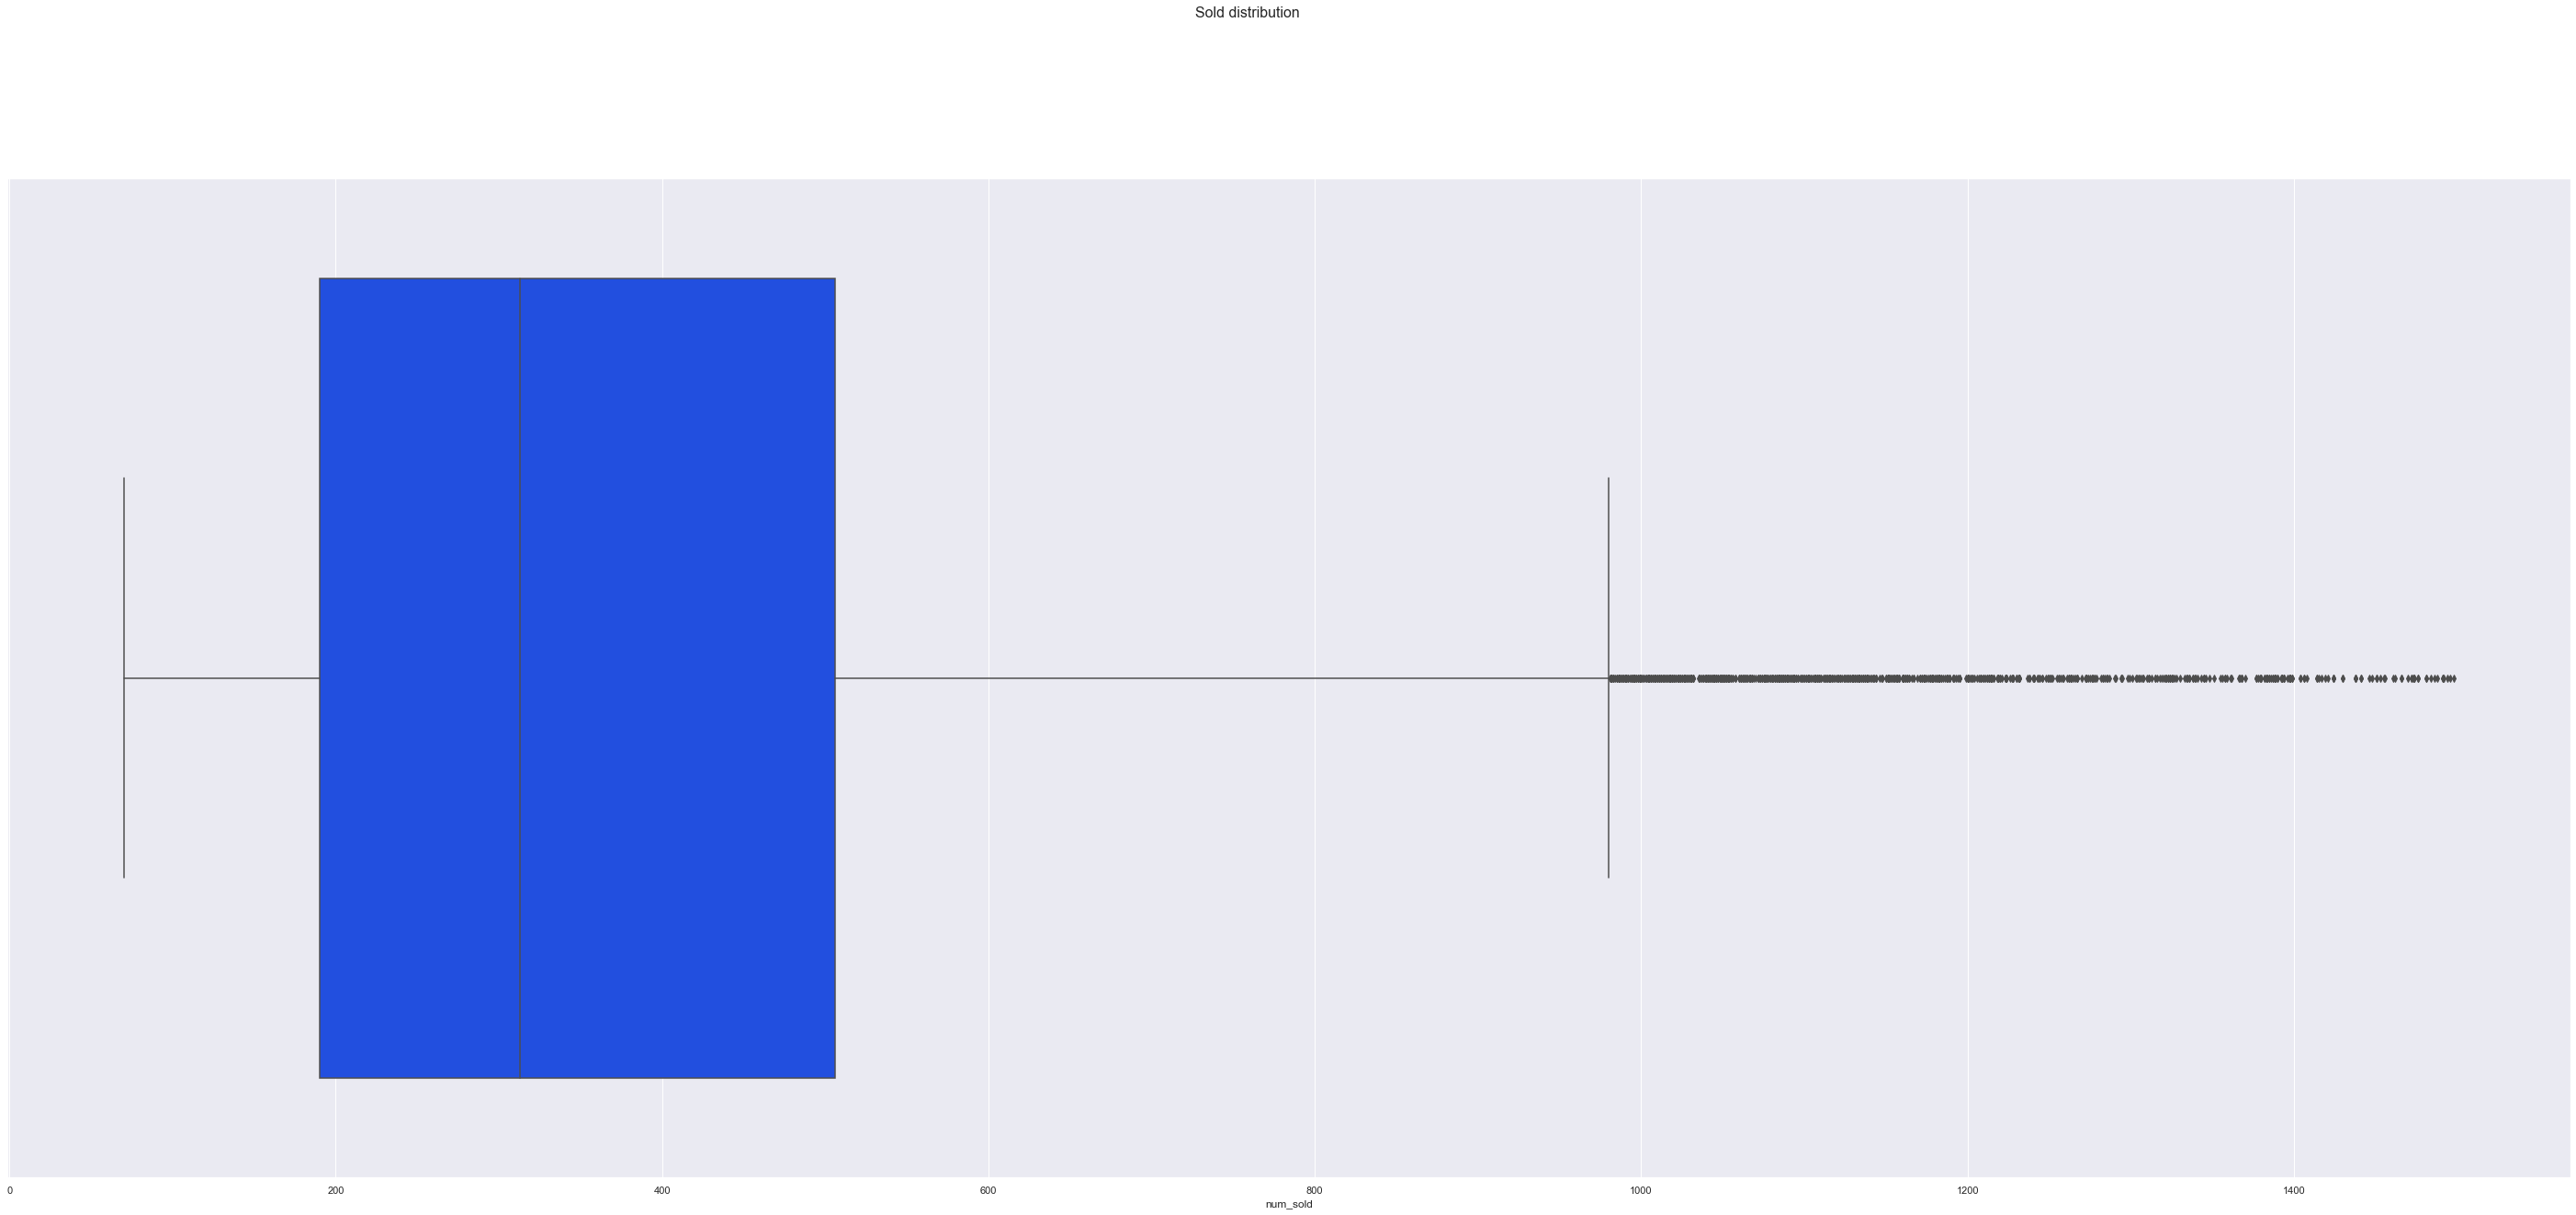

In [106]:
fig, axes = plt.subplots(figsize=(50, 20))
sns.boxplot(df_train["num_sold"], color = colors[0])
plt.suptitle("Sold distribution", y=1.01, size = 16)
#plt.tight_layout()
plt.show()

In [133]:
g_mean = df_train.groupby(['day', 'month', 'store', 'country'], as_index = False)['num_sold'].mean()
g_sum = df_train.groupby(['day', 'month', 'store', 'country'], as_index = False)['num_sold'].sum()

In [321]:
df_train.shape

(26189, 10)

In [346]:
d = df_train.sort_values(['product', 'store', 'country', 'day','month','year'])

In [347]:
d.head(50)

,row_id,date,num_sold,country,store,product,year,month,day,day_month
1,1,2015-01-01,520,0,0,0,0,1,1,2
6571,6571,2016-01-01,523,0,0,0,1,1,1,2
13159,13159,2017-01-01,729,0,0,0,2,1,1,2
19729,19729,2018-01-01,621,0,0,0,3,1,1,2
559,559,2015-02-01,434,0,0,0,0,2,1,3
7129,7129,2016-02-01,321,0,0,0,1,2,1,3
13717,13717,2017-02-01,324,0,0,0,2,2,1,3
20287,20287,2018-02-01,363,0,0,0,3,2,1,3
1063,1063,2015-03-01,472,0,0,0,0,3,1,4
7651,7651,2016-03-01,372,0,0,0,1,3,1,4


FE

In [328]:
train = df_train.copy()

In [355]:
f_min = lambda x: x.rolling(window=4, min_periods=1).min()

f_max = lambda x: x.rolling(window=4, min_periods=1).max()

f_mean = lambda x: x.rolling(window=4, min_periods=1).mean()

f_std = lambda x: x.rolling(window=4, min_periods=1).std()

function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']

for i in range(len(function_list)):
    d[('num_sold_%s' % function_name[i])] = d.sort_values('year').groupby(['product', 'store', 'country', 'day','month'])['num_sold'].apply(function_list[i])

d['num_sold_std'].fillna(0, inplace=True)

In [356]:
d.head(10)

,row_id,date,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std
1,1,2015-01-01,520,0,0,0,0,1,1,2,520.0,520.0,520.000000,0.000000
6571,6571,2016-01-01,523,0,0,0,1,1,1,2,520.0,523.0,521.500000,2.121320
13159,13159,2017-01-01,729,0,0,0,2,1,1,2,520.0,729.0,590.666667,119.809571
19729,19729,2018-01-01,621,0,0,0,3,1,1,2,520.0,729.0,598.250000,98.992845
559,559,2015-02-01,434,0,0,0,0,2,1,3,434.0,434.0,434.000000,0.000000
7129,7129,2016-02-01,321,0,0,0,1,2,1,3,321.0,434.0,377.500000,79.903066
13717,13717,2017-02-01,324,0,0,0,2,2,1,3,321.0,434.0,359.666667,64.392028
20287,20287,2018-02-01,363,0,0,0,3,2,1,3,321.0,434.0,360.500000,52.602281
1063,1063,2015-03-01,472,0,0,0,0,3,1,4,472.0,472.0,472.000000,0.000000
7651,7651,2016-03-01,372,0,0,0,1,3,1,4,372.0,472.0,422.000000,70.710678


In [360]:
lag_list = [1, 2, 3]

for lag in lag_list:
    ft_name = ('num_sold_shifted%s' % lag)
    d[ft_name] = d.sort_values('year').groupby(['product', 'store', 'country', 'day','month'])['num_sold'].shift(lag)
    d[ft_name].fillna(0, inplace=True)

In [364]:
d = d.drop(columns = ['num_sold_shifted4'])

In [365]:
d.head(10)

,row_id,date,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std,num_sold_shifted1,num_sold_shifted2,num_sold_shifted3
1,1,2015-01-01,520,0,0,0,0,1,1,2,520.0,520.0,520.000000,0.000000,0.0,0.0,0.0
6571,6571,2016-01-01,523,0,0,0,1,1,1,2,520.0,523.0,521.500000,2.121320,520.0,0.0,0.0
13159,13159,2017-01-01,729,0,0,0,2,1,1,2,520.0,729.0,590.666667,119.809571,523.0,520.0,0.0
19729,19729,2018-01-01,621,0,0,0,3,1,1,2,520.0,729.0,598.250000,98.992845,729.0,523.0,520.0
559,559,2015-02-01,434,0,0,0,0,2,1,3,434.0,434.0,434.000000,0.000000,0.0,0.0,0.0
7129,7129,2016-02-01,321,0,0,0,1,2,1,3,321.0,434.0,377.500000,79.903066,434.0,0.0,0.0
13717,13717,2017-02-01,324,0,0,0,2,2,1,3,321.0,434.0,359.666667,64.392028,321.0,434.0,0.0
20287,20287,2018-02-01,363,0,0,0,3,2,1,3,321.0,434.0,360.500000,52.602281,324.0,321.0,434.0
1063,1063,2015-03-01,472,0,0,0,0,3,1,4,472.0,472.0,472.000000,0.000000,0.0,0.0,0.0
7651,7651,2016-03-01,372,0,0,0,1,3,1,4,372.0,472.0,422.000000,70.710678,472.0,0.0,0.0


In [366]:
d['num_trend'] = d['num_sold']

for lag in lag_list:
    ft_name = ('num_sold_shifted%s' % lag)
    d['num_trend'] -= d[ft_name]

d['num_trend'] /= len(lag_list) + 1

In [368]:
d.head(15)

,row_id,date,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std,num_sold_shifted1,num_sold_shifted2,num_sold_shifted3,num_trend
1,1,2015-01-01,520,0,0,0,0,1,1,2,520.0,520.0,520.000000,0.000000,0.0,0.0,0.0,130.00
6571,6571,2016-01-01,523,0,0,0,1,1,1,2,520.0,523.0,521.500000,2.121320,520.0,0.0,0.0,0.75
13159,13159,2017-01-01,729,0,0,0,2,1,1,2,520.0,729.0,590.666667,119.809571,523.0,520.0,0.0,-78.50
19729,19729,2018-01-01,621,0,0,0,3,1,1,2,520.0,729.0,598.250000,98.992845,729.0,523.0,520.0,-287.75
559,559,2015-02-01,434,0,0,0,0,2,1,3,434.0,434.0,434.000000,0.000000,0.0,0.0,0.0,108.50
7129,7129,2016-02-01,321,0,0,0,1,2,1,3,321.0,434.0,377.500000,79.903066,434.0,0.0,0.0,-28.25
13717,13717,2017-02-01,324,0,0,0,2,2,1,3,321.0,434.0,359.666667,64.392028,321.0,434.0,0.0,-107.75
20287,20287,2018-02-01,363,0,0,0,3,2,1,3,321.0,434.0,360.500000,52.602281,324.0,321.0,434.0,-179.00
1063,1063,2015-03-01,472,0,0,0,0,3,1,4,472.0,472.0,472.000000,0.000000,0.0,0.0,0.0,118.00
7651,7651,2016-03-01,372,0,0,0,1,3,1,4,372.0,472.0,422.000000,70.710678,472.0,0.0,0.0,-25.00


In [369]:
d = d.sort_values('row_id')

In [378]:
d = d.drop(columns = ['row_id'])

In [379]:
d.head(10)

,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std,num_sold_shifted1,num_sold_shifted2,num_sold_shifted3,num_trend
0,329,0,0,1,0,1,1,2,329.0,329.0,329.0,0.0,0.0,0.0,0.0,82.25
1,520,0,0,0,0,1,1,2,520.0,520.0,520.0,0.0,0.0,0.0,0.0,130.00
2,146,0,0,2,0,1,1,2,146.0,146.0,146.0,0.0,0.0,0.0,0.0,36.50
3,572,0,1,1,0,1,1,2,572.0,572.0,572.0,0.0,0.0,0.0,0.0,143.00
4,911,0,1,0,0,1,1,2,911.0,911.0,911.0,0.0,0.0,0.0,0.0,227.75
5,283,0,1,2,0,1,1,2,283.0,283.0,283.0,0.0,0.0,0.0,0.0,70.75
6,526,1,0,1,0,1,1,2,526.0,526.0,526.0,0.0,0.0,0.0,0.0,131.50
7,906,1,0,0,0,1,1,2,906.0,906.0,906.0,0.0,0.0,0.0,0.0,226.50
8,250,1,0,2,0,1,1,2,250.0,250.0,250.0,0.0,0.0,0.0,0.0,62.50
9,1005,1,1,1,0,1,1,2,1005.0,1005.0,1005.0,0.0,0.0,0.0,0.0,251.25


Splitting data

In [380]:
df_train_set = d.query('year < 3').copy()
df_test_set = d.query('year== 3').copy()

In [424]:
d.head(10)

,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std,num_sold_shifted1,num_sold_shifted2,num_sold_shifted3,num_trend
0,329,0,0,1,0,1,1,2,329.0,329.0,329.0,0.0,0.0,0.0,0.0,82.25
1,520,0,0,0,0,1,1,2,520.0,520.0,520.0,0.0,0.0,0.0,0.0,130.00
2,146,0,0,2,0,1,1,2,146.0,146.0,146.0,0.0,0.0,0.0,0.0,36.50
3,572,0,1,1,0,1,1,2,572.0,572.0,572.0,0.0,0.0,0.0,0.0,143.00
4,911,0,1,0,0,1,1,2,911.0,911.0,911.0,0.0,0.0,0.0,0.0,227.75
5,283,0,1,2,0,1,1,2,283.0,283.0,283.0,0.0,0.0,0.0,0.0,70.75
6,526,1,0,1,0,1,1,2,526.0,526.0,526.0,0.0,0.0,0.0,0.0,131.50
7,906,1,0,0,0,1,1,2,906.0,906.0,906.0,0.0,0.0,0.0,0.0,226.50
8,250,1,0,2,0,1,1,2,250.0,250.0,250.0,0.0,0.0,0.0,0.0,62.50
9,1005,1,1,1,0,1,1,2,1005.0,1005.0,1005.0,0.0,0.0,0.0,0.0,251.25


In [433]:
d

,num_sold,country,store,product,year,month,day,day_month,num_sold_min,num_sold_max,num_sold_mean,num_sold_std,num_sold_shifted1,num_sold_shifted2,num_sold_shifted3,num_trend
0,329,0,0,1,0,1,1,2,329.0,329.0,329.00,0.000000,0.0,0.0,0.0,82.25
1,520,0,0,0,0,1,1,2,520.0,520.0,520.00,0.000000,0.0,0.0,0.0,130.00
2,146,0,0,2,0,1,1,2,146.0,146.0,146.00,0.000000,0.0,0.0,0.0,36.50
3,572,0,1,1,0,1,1,2,572.0,572.0,572.00,0.000000,0.0,0.0,0.0,143.00
4,911,0,1,0,0,1,1,2,911.0,911.0,911.00,0.000000,0.0,0.0,0.0,227.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,823,2,0,0,3,12,31,43,723.0,1037.0,896.00,148.508137,1037.0,1001.0,723.0,-484.50
26294,250,2,0,2,3,12,31,43,215.0,290.0,257.75,32.968419,290.0,276.0,215.0,-132.75
26295,1004,2,1,1,3,12,31,43,867.0,1188.0,1045.50,141.299917,1188.0,1123.0,867.0,-543.50
26296,1441,2,1,0,3,12,31,43,1315.0,1441.0,1378.00,89.095454,1315.0,0.0,0.0,31.50


In [434]:
X_train = d.drop(['num_sold', 'year'], axis=1)
Y_train = d['num_sold'].astype(int)
#X_valid = d.drop(['num_sold'], axis=1)
#Y_valid = d['num_sold'].astype(int)

In [435]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [436]:
def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg", height=7)
    plt.plot([min_val, max_val], [min_val, max_val], 'm--')
    plt.title(title, fontsize=9)
    plt.show()

In [437]:
from xgboost import XGBRegressor
from xgboost import plot_importance

params ={'lambda': 0.0012338191278124635, 'alpha': 3.284395992431614, 'eta': 0.09886834650237164, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.018, 'n_estimators': 2000, 'max_depth': 5, 'min_child_weight': 3}

xgb_model = XGBRegressor(**params)
xgb_model.fit(X_train, 
              Y_train, 
              eval_metric="mape", 
              verbose=20)

XGBRegressor(alpha=3.284395992431614, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             eta=0.09886834650237164, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.0012338191278124635, learning_rate=0.018,
             max_delta_step=0, max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=3.28439593,
             reg_lambda=0.00123381917, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

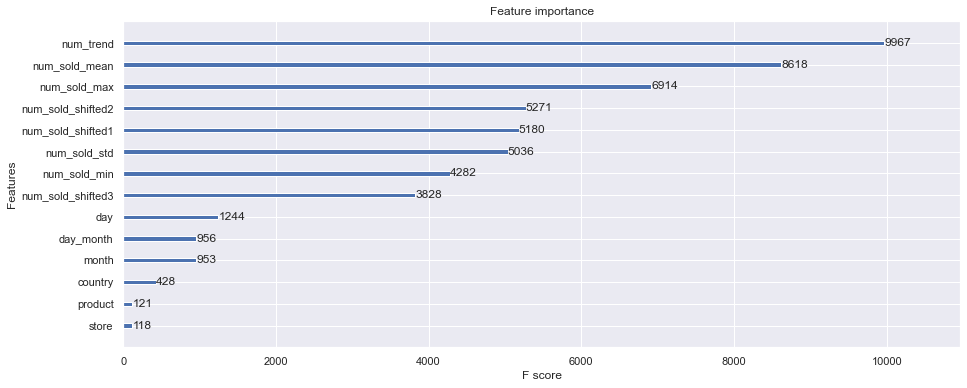

In [438]:
plt.rcParams["figure.figsize"] = (15, 6)
plot_importance(xgb_model)
plt.show()

In [439]:
xgb_train_pred = xgb_model.predict(X_train)
#xgb_test_pred = xgb_model.predict(X_valid)

In [440]:
print('Train SMAPE:', (smape(Y_train, xgb_train_pred)))
#print('Validation SMAPE:', (smape(Y_valid, xgb_test_pred)))

Train SMAPE: 0.9129743975294926


In [409]:
X_test = pd.merge(df_test, X_valid,on=['country', 'store', 'product', 'month', 'day'], how='left', suffixes=['', '_'])

In [446]:
X_test = X_test.drop(columns = ['day_month_'])

In [447]:
X_test.shape

(6570, 14)

In [448]:
X_train.shape

(26189, 14)

In [449]:
xgb_test_pred = xgb_model.predict(X_test)

In [450]:
xgb_test_pred = xgb_test_pred.astype('int32')

In [451]:
xgb_test_pred

array([ 408,  632,  176, ...,  995, 1440,  399], dtype=int32)

In [452]:
prediction = pd.DataFrame(df_test['row_id'], columns = ['row_id'])
prediction['num_sold'] = xgb_test_pred
prediction.to_csv('submission.csv', index=False)
prediction.head(10)

,row_id,num_sold
0,26298,408
1,26299,632
2,26300,176
3,26301,707
4,26302,1047
5,26303,318
6,26304,649
7,26305,990
8,26306,297
9,26307,1142
